### ***Note:*** I recommend to run this notebook on Google collaboratory. Before running on colab make sure you have downloaded the dataset and uploaded it to a folder named *kaggle* on your drive. Then download this notebook and upload it to the drive. The run this. If you want to run this on your local machine. Follow the below steps.
- Download the data set from the link given in readme.md.
- Extract the dataset to a folder.
- Download this notebook.
- Make corresponding changes in this notebook to access the extracted file.
(You might have to change the 'base_dir' variable in this notebook on code cell 7 and replace the path with the path where the dataset was extracted to on your local machine)

**In this notebook, I have saved the dataset on google drive and thus the paths are assigned as per that.**


In [ ]:
!pip install patool # module is installed(used to extract zip file).

     |████████████████████████████████| 81kB 4.2MB/s 


## **Importing the required modules**

Here we import the required modules.

In [ ]:
import tensorflow as tf # open source library used in ML/DL

In [ ]:
import os   # accessing folder paths
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import patoolib  # This is useful to extract zip files 
import cv2,glob 
import shutil   # this module is used to do file accessing operations

The below modules/libraries are used in CNN model training process.

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import warnings

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


## **Load The Dataset**

The first step is to load dataset that is used for training the model. The dataset must have two separate Folders named training and test sets.
The training dataset is used to train the model whereas the test dataset is used to test the accuracy of the model in predicting new data which it has never seen before.


Below cell links the google drive to this current notebook.
The google drive has zip file named archive which contains the dataset.

In [ ]:
# Here we accesss the google drive where the dataset is stored.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Here we extract the archive.zip which has the dataset
patoolib.extract_archive('/content/drive/MyDrive/kaggle/archive.zip', outdir='/content/')

patool: Extracting /content/drive/MyDrive/kaggle/archive.zip ...
patool: running /usr/bin/7z x -o/content/ -- /content/drive/MyDrive/kaggle/archive.zip
patool: ... /content/drive/MyDrive/kaggle/archive.zip extracted to `/content/'.


'/content/'

In [ ]:
# Below is the directory where the extracted data is stored.
base_dir = '/content/DataISL'

Assign variables with the proper file path for training and validation sets.

In [ ]:
# Below is a dictionary used to create the folders with respective names
classes = {0:'1',1:'2',2:'3', 3:'4', 4:'5', 5:'6', 6:'7', 7:'8',
           8:'9',9:'A',10:'B',11:'C',12:'D',13:'E',14:'F',15:'G',16:'H',17:'I',
           18:'J',19:'K',20:'L',21:'M',22:'N',23:'O',24:'P',25:'Q',26:'R',27:'S',28:'T',29:'U',
           30:'V',31:'W',32:'X',33:'Y',34:'Z'}

In [ ]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir,'test')

In [ ]:
train_path = train_dir
test_path = test_dir
one  = os.path.join(train_path,'1')

# Below line is used to check how many directories are 
# there in the train dataset.
# one can print the below variable to know number of directories.
num_data_tr = len(os.listdir(one))
print(num_data_tr)

600


In [ ]:
for cl in classes.values():
  img_path = os.path.join(train_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  #print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]


  if not os.path.exists(os.path.join(base_dir, 'val', cl)):
    os.makedirs(os.path.join(base_dir, 'val', cl))
    for v in val:
      shutil.move(v, os.path.join(base_dir, 'val', cl))

In [ ]:
print(len(val))
one  = os.path.join(train_path,'1')

# Below line is used to check how many directories are 
# there in the train dataset.
# one can print the below variable to know number of directories.
num_data_tr = len(os.listdir(one))
print(num_data_tr)

120
480


Below line of code creates a generator which generates images continuously.
This is done using ImageDataGenearator function available in tensorflow.

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [ ]:
#train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=5,shuffle=True)
#test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=5, shuffle=True)

# This code cell creates a Data generator that provides the images to train the model.
# here this data generator gives the data in Batches as specified in the above cell.

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory= train_path,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical')
image_gen_test = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=test_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical')

Found 16800 images belonging to 35 classes.
Found 5250 images belonging to 35 classes.


In [ ]:
validation_dir = os.path.join(base_dir,'val')

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory = validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='categorical')

Found 4200 images belonging to 35 classes.


In [ ]:
one  = os.path.join(train_path,'1')

# Below line is used to check how many directories are 
# there in the train dataset.
# one can print the below variable to know number of directories.
data_in_one_folder = len(os.listdir(one))


# Below code gets the total number of training data set available after
# splitting the dataset for validation
total_train = data_in_one_folder * (len(os.listdir(train_dir)))

# to get total val
one_in_val = os.path.join(validation_dir,'1')
data_in_one_folder = len(os.listdir(one_in_val))


# total dataset in val directory
total_val = data_in_one_folder * (len(os.listdir(validation_dir)))
print(total_train,total_val)

16800 4200


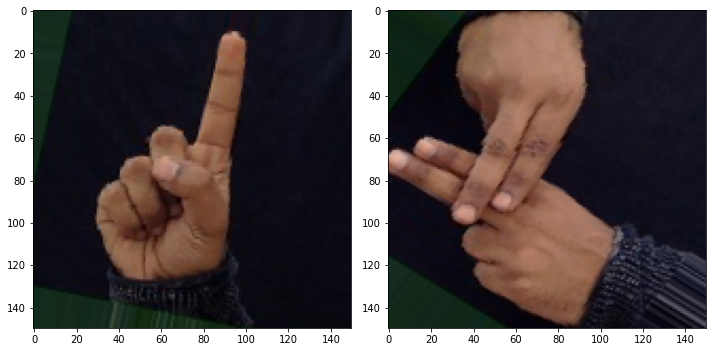

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
imgs, labels = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

# Building the CNN model

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(tf.keras.layers.Dropout(0.2))
model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(35,activation ="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 128)       0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#history2 = model.fit(train_data_gen, epochs=50,  validation_data = val_data_gen )
print(int(np.ceil(total_train / float(BATCH_SIZE))))
print(int(np.ceil(train_data_gen.n / float(BATCH_SIZE))))
epochs=10
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n/ float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n/ float(BATCH_SIZE)))
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
imgs, labels = next(test_data_gen) 
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 5.240554310148582e-05; accuracy of 100.0%


In [ ]:
STEP_SIZE_TEST = 1
test_data_gen.reset()
imgs = model.predict(test_data_gen,
steps=STEP_SIZE_TEST,
verbose=1)

1/1 [==============================] - 1s 572ms/step


In [ ]:
np.argmax(imgs[0])

34

In [ ]:
image = next(test_data_gen)[0]
plotImages(image)
predictions_single = model.predict(image)

print(classes[np.argmax(predictions_single[0])],classes[np.argmax(predictions_single[1])])


In [ ]:
model.save('best_model_ISL.h5')

After the model is saved we can Load the model so in future we need not train the model from scrath


In [ ]:
model_path = '/content/drive/MyDrive/kaggle/best_model_ISL.h5'
reloaded = tf.keras.models.load_model(
  model_path)
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  #custom_objects={'KerasLayer': hub.KerasLayer})

reloaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 128)       0

The above cell loads the previous trained model and we will check it once to make sure it's working as expected


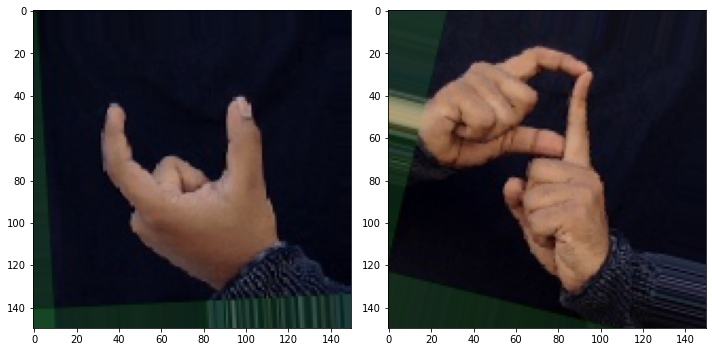

Original Labels : U D
U D


In [ ]:

image,labels = next(test_data_gen)

plotImages(image)

predictions_single = reloaded.predict(image)

print(f'Original Labels : {classes[np.argmax(labels[0])]} {classes[np.argmax(labels[1])]}') # original labels
print(f'Predicted outputs : {classes[np.argmax(predictions_single[0])]} {classes[np.argmax(predictions_single[1])]}') ## model predicted output

In the next step we aim to access video camera of the device to get the gestures. Checkout Video Capture.ipynb file for capturing the data from the camera. 